### TXx and Rx1 composites

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import sys
sys.path.append('/home/563/rl5183/PhD-research/Functions')
import functions as func
from importlib import reload

In [2]:
func=reload(func)

In [3]:
hadex_TXx_ds = xr.open_dataset('HadEX3_TXx_1901-2018_ADW_61-90_1.25x1.875deg.nc')
hadex_Rx1_ds = xr.open_dataset('HadEX3_Rx1day_1901-2018_ADW_61-90_1.25x1.875deg.nc')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'Ann' has multiple fill values {-99.9, -99.9}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'Jan' has multiple fill values {-99.9, -99.9}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'Feb' has multiple fill values {-99.9, -99.9}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'Mar' has multiple fill values {-99.9, -99.9}, decoding all values to NaN.
  new_vars[k] = deco

In [4]:
TXx_jan = hadex_TXx_ds.Jan.drop_sel(time=1901) #drop first year 
TXx_feb = hadex_TXx_ds.Feb.drop_sel(time=1901)
TXx_mar = hadex_TXx_ds.Mar.drop_sel(time=1901)
TXx_apr = hadex_TXx_ds.Apr.drop_sel(time=1901)
TXx_may = hadex_TXx_ds.May.drop_sel(time=1901)
TXx_jun = hadex_TXx_ds.Jun.drop_sel(time=1901)
TXx_jul = hadex_TXx_ds.Jul.drop_sel(time=1901)
TXx_aug = hadex_TXx_ds.Aug.drop_sel(time=1901)
TXx_sep = hadex_TXx_ds.Sep.drop_sel(time=1901)
TXx_oct = hadex_TXx_ds.Oct.drop_sel(time=1901)
TXx_nov = hadex_TXx_ds.Nov.drop_sel(time=1901)
TXx_dec = hadex_TXx_ds.Dec #keep previous year december 

In [5]:
Rx1_jan = hadex_Rx1_ds.Jan.drop_sel(time=1901)
Rx1_feb = hadex_Rx1_ds.Feb.drop_sel(time=1901)
Rx1_mar = hadex_Rx1_ds.Mar.drop_sel(time=1901)
Rx1_apr = hadex_Rx1_ds.Apr.drop_sel(time=1901)
Rx1_may = hadex_Rx1_ds.May.drop_sel(time=1901)
Rx1_jun = hadex_Rx1_ds.Jun.drop_sel(time=1901)
Rx1_jul = hadex_Rx1_ds.Jul.drop_sel(time=1901)
Rx1_aug = hadex_Rx1_ds.Aug.drop_sel(time=1901)
Rx1_sep = hadex_Rx1_ds.Sep.drop_sel(time=1901)
Rx1_oct = hadex_Rx1_ds.Oct.drop_sel(time=1901)
Rx1_nov = hadex_Rx1_ds.Nov.drop_sel(time=1901)
Rx1_dec = hadex_Rx1_ds.Dec

In [6]:
#make december years match jan and feb for before taking seasonal averages
TXx_dec_shifted = func.change_dec_years(TXx_dec)
Rx1_dec_shifted = func.change_dec_years(Rx1_dec)

In [7]:
#find seasonal maximum of TXx 
max_TXx_dec_jan = np.maximum(TXx_dec, TXx_jan)
seasonal_TXx_djf = np.maximum(max_TXx_dec_jan, TXx_feb)
max_TXx_sep_oct = np.maximum(TXx_sep, TXx_oct)
seasonal_TXx_son = np.maximum(max_TXx_sep_oct, TXx_nov)
max_TXx_jun_jul = np.maximum(TXx_jun, TXx_jul)
seasonal_TXx_jja = np.maximum(max_TXx_jun_jul, TXx_aug)
max_TXx_mar_apr = np.maximum(TXx_mar, TXx_apr)
seasonal_TXx_mam = np.maximum(max_TXx_mar_apr, TXx_may)

In [8]:
#find seasonal maximum of Rx1
max_Rx1_dec_jan = np.maximum(Rx1_dec, Rx1_jan)
seasonal_Rx1_djf = np.maximum(max_Rx1_dec_jan, Rx1_feb)
max_Rx1_sep_oct = np.maximum(Rx1_sep, Rx1_oct)
seasonal_Rx1_son = np.maximum(max_Rx1_sep_oct, Rx1_nov)
max_Rx1_jun_jul = np.maximum(Rx1_jun, Rx1_jul)
seasonal_Rx1_jja = np.maximum(max_Rx1_jun_jul, Rx1_aug)
max_Rx1_mar_apr = np.maximum(Rx1_mar, Rx1_apr)
seasonal_Rx1_mam = np.maximum(max_Rx1_mar_apr, Rx1_may)

In [9]:
#select out last 30 years 
seasonal_TXx_djf_1989_2018 = seasonal_TXx_djf.sel(time=slice('1989', '2018'))
seasonal_TXx_son_1989_2018 = seasonal_TXx_son.sel(time=slice('1989', '2018'))
seasonal_TXx_jja_1989_2018 = seasonal_TXx_jja.sel(time=slice('1989', '2018'))
seasonal_TXx_mam_1989_2018 = seasonal_TXx_mam.sel(time=slice('1989', '2018'))
seasonal_Rx1_djf_1989_2018 = seasonal_Rx1_djf.sel(time=slice('1989', '2018'))
seasonal_Rx1_son_1989_2018 = seasonal_Rx1_son.sel(time=slice('1989', '2018'))
seasonal_Rx1_jja_1989_2018 = seasonal_Rx1_jja.sel(time=slice('1989', '2018'))
seasonal_Rx1_mam_1989_2018 = seasonal_Rx1_mam.sel(time=slice('1989', '2018'))

In [10]:
#calculate nino34 index to define el nino years
ersst_ds = xr.open_dataset('/g/data/eg3/jxb548/OBSDATA/ersstv5.1950_2018.nc')
ersst_sst = ersst_ds.sst

In [11]:
#detrend
ersst_detrend = np.apply_along_axis(func.detrend_2step, 0, ersst_sst)
ersst_sst_dt = xr.DataArray(ersst_detrend, coords=ersst_sst.coords, attrs=ersst_sst.attrs)

In [12]:
#calculate nino34 index
nino34_index =  func.nino34_index(ersst_sst_dt, '1950-01', '1979-12')
yearly_seasonal_nino34_index = func.seasonal_mean_nino_index(nino34_index)

In [13]:
yearly_seasonal_nino34_index_djf = yearly_seasonal_nino34_index.sel(season='DJF').drop_sel(seasonyear=2019)

In [14]:
el_nino_years = yearly_seasonal_nino34_index_djf.where(yearly_seasonal_nino34_index_djf>0.5, drop=True).seasonyear
la_nina_years = yearly_seasonal_nino34_index_djf.where(yearly_seasonal_nino34_index_djf<-0.5, drop=True).seasonyear

In [15]:
el_nino_years

<xarray.DataArray 'seasonyear' (seasonyear: 22)>
array([1952, 1954, 1958, 1964, 1966, 1969, 1970, 1973, 1977, 1978, 1980, 1983,
       1987, 1988, 1992, 1995, 1998, 2003, 2005, 2007, 2010, 2016])
Coordinates:
    season      <U3 'DJF'
  * seasonyear  (seasonyear) int64 1952 1954 1958 1964 ... 2005 2007 2010 2016

In [16]:
la_nina_years

<xarray.DataArray 'seasonyear' (seasonyear: 22)>
array([1951, 1955, 1956, 1965, 1971, 1972, 1974, 1975, 1976, 1984, 1985, 1989,
       1996, 1999, 2000, 2001, 2008, 2009, 2011, 2012, 2017, 2018])
Coordinates:
    season      <U3 'DJF'
  * seasonyear  (seasonyear) int64 1951 1955 1956 1965 ... 2011 2012 2017 2018

In [17]:
#As december was pushed over to the following year to take seasonal average,
#need to go back one year before making composites
el_nino_years_1989_2018 = el_nino_years.sel(seasonyear=slice('1990', '2018')) #1990 not 1989 because years have been shifted forward by one 
el_nino_years_offset = el_nino_years_1989_2018 - 1
la_nina_years_1989_2018 = la_nina_years.sel(seasonyear=slice('1990', '2018'))
la_nina_years_offset = la_nina_years_1989_2018 - 1

In [18]:
#dont use offset for DJF as dec has been pushed forward want year that corresponds to jan, feb
seasonal_TXx_djf_1989_2018_el_nino = seasonal_TXx_djf_1989_2018.where(seasonal_TXx_djf_1989_2018.time.isin(el_nino_years_1989_2018), drop=True)
seasonal_TXx_djf_1989_2018_la_nina = seasonal_TXx_djf_1989_2018.where(seasonal_TXx_djf_1989_2018.time.isin(la_nina_years_1989_2018), drop=True)
#dont use offset for MAM as want followiwng season 
seasonal_TXx_mam_1989_2018_el_nino = seasonal_TXx_mam_1989_2018.where(seasonal_TXx_mam_1989_2018.time.isin(el_nino_years_1989_2018), drop=True)
seasonal_TXx_mam_1989_2018_la_nina = seasonal_TXx_mam_1989_2018.where(seasonal_TXx_mam_1989_2018.time.isin(la_nina_years_1989_2018), drop=True)
#preceeding seasons use offset years 
seasonal_TXx_son_1989_2018_el_nino = seasonal_TXx_son_1989_2018.where(seasonal_TXx_son_1989_2018.time.isin(el_nino_years_offset), drop=True)
seasonal_TXx_son_1989_2018_la_nina = seasonal_TXx_son_1989_2018.where(seasonal_TXx_son_1989_2018.time.isin(la_nina_years_offset), drop=True)
seasonal_TXx_jja_1989_2018_el_nino = seasonal_TXx_jja_1989_2018.where(seasonal_TXx_jja_1989_2018.time.isin(el_nino_years_offset), drop=True)
seasonal_TXx_jja_1989_2018_la_nina = seasonal_TXx_jja_1989_2018.where(seasonal_TXx_jja_1989_2018.time.isin(la_nina_years_offset), drop=True)

In [19]:
#dont use offset for DJF as dec has been pushed forward want year that corresponds to jan, feb
seasonal_Rx1_djf_1989_2018_el_nino = seasonal_Rx1_djf_1989_2018.where(seasonal_Rx1_djf_1989_2018.time.isin(el_nino_years_1989_2018), drop=True)
seasonal_Rx1_djf_1989_2018_la_nina = seasonal_Rx1_djf_1989_2018.where(seasonal_Rx1_djf_1989_2018.time.isin(la_nina_years_1989_2018), drop=True)
#dont use offset for MAM as want followiwng season 
seasonal_Rx1_mam_1989_2018_el_nino = seasonal_Rx1_mam_1989_2018.where(seasonal_Rx1_mam_1989_2018.time.isin(el_nino_years_1989_2018), drop=True)
seasonal_Rx1_mam_1989_2018_la_nina = seasonal_Rx1_mam_1989_2018.where(seasonal_Rx1_mam_1989_2018.time.isin(la_nina_years_1989_2018), drop=True)
#preceeding seasons use offset years 
seasonal_Rx1_son_1989_2018_el_nino = seasonal_Rx1_son_1989_2018.where(seasonal_Rx1_son_1989_2018.time.isin(el_nino_years_offset), drop=True)
seasonal_Rx1_son_1989_2018_la_nina = seasonal_Rx1_son_1989_2018.where(seasonal_Rx1_son_1989_2018.time.isin(la_nina_years_offset), drop=True)
seasonal_Rx1_jja_1989_2018_el_nino = seasonal_Rx1_jja_1989_2018.where(seasonal_Rx1_jja_1989_2018.time.isin(el_nino_years_offset), drop=True)
seasonal_Rx1_jja_1989_2018_la_nina = seasonal_Rx1_jja_1989_2018.where(seasonal_Rx1_jja_1989_2018.time.isin(la_nina_years_offset), drop=True)

Text(0.5, 0.98, 'Seasonal max TXx El Nino')

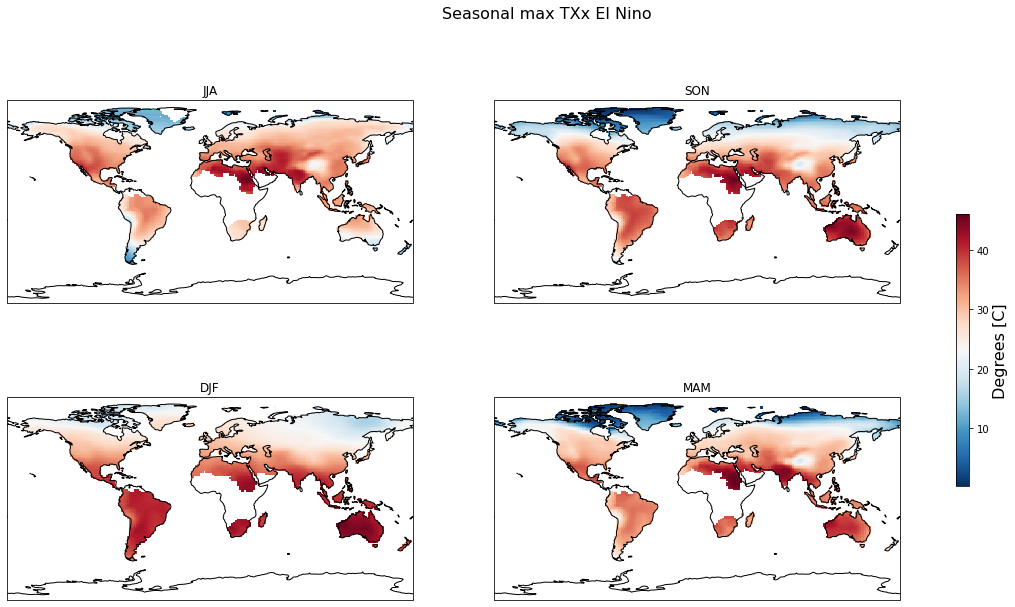

In [27]:
#plot el nino composites for each season TXx
fig = plt.figure(figsize=(20,10))
axs = []

#vmin = 
#vmax = 

ax = fig.add_subplot(221, projection=ccrs.PlateCarree())
C = seasonal_TXx_jja_1989_2018_el_nino.mean(dim='time').plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
ax.set_title('JJA')
axs.append(ax)

ax = fig.add_subplot(222, projection=ccrs.PlateCarree())
C = seasonal_TXx_son_1989_2018_el_nino.mean(dim='time').plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
ax.set_title('SON')
axs.append(ax)

ax = fig.add_subplot(223, projection=ccrs.PlateCarree())
C = seasonal_TXx_djf_1989_2018_el_nino.mean(dim='time').plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
ax.set_title('DJF')
axs.append(ax)

ax = fig.add_subplot(224, projection=ccrs.PlateCarree())
C = seasonal_TXx_mam_1989_2018_el_nino.mean(dim='time').plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
ax.set_title('MAM')
axs.append(ax)

cbar = plt.colorbar(C, ax=axs, shrink=0.5, pad=0.05)
cbar.ax.set_ylabel('Degrees [C]', fontsize=16)

fig.suptitle('Seasonal max TXx El Nino', fontsize=16)

Text(0.5, 0.98, 'Seasonal max TXx La Nina')

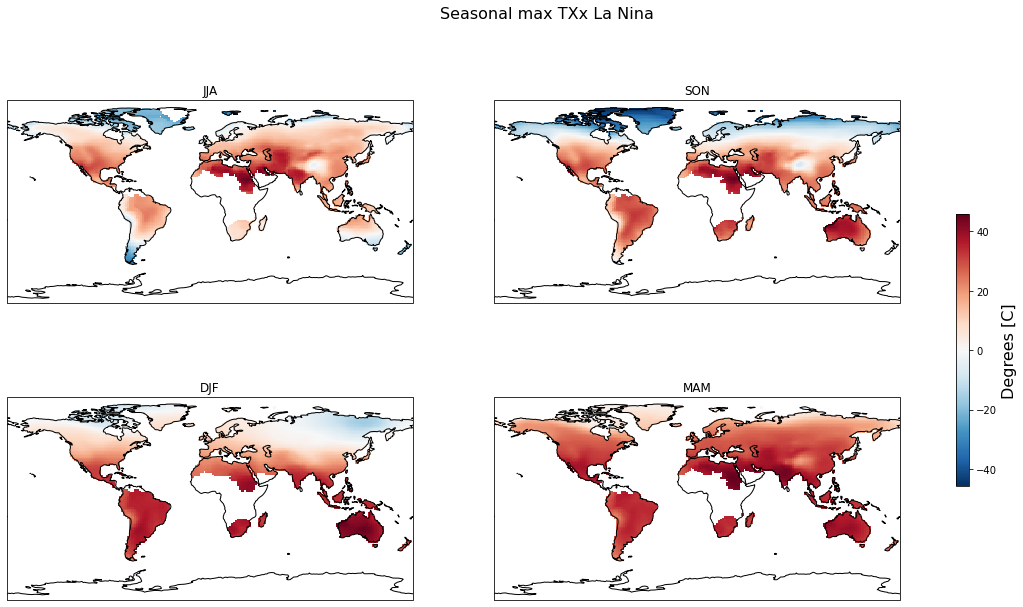

In [28]:
#plot la nina composites for each season 
fig = plt.figure(figsize=(20,10))
axs = []

#vmin = 
#vmax = 

ax = fig.add_subplot(221, projection=ccrs.PlateCarree())
C = seasonal_TXx_jja_1989_2018_la_nina.mean(dim='time').plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
ax.set_title('JJA')
axs.append(ax)

ax = fig.add_subplot(222, projection=ccrs.PlateCarree())
C = seasonal_TXx_son_1989_2018_la_nina.mean(dim='time').plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
ax.set_title('SON')
axs.append(ax)

ax = fig.add_subplot(223, projection=ccrs.PlateCarree())
C = seasonal_TXx_djf_1989_2018_la_nina.mean(dim='time').plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
ax.set_title('DJF')
axs.append(ax)

ax = fig.add_subplot(224, projection=ccrs.PlateCarree())
C = seasonal_TXx_mam_1989_2018_la_nina.mean(dim='time').plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
ax.set_title('MAM')
axs.append(ax)

cbar = plt.colorbar(C, ax=axs, shrink=0.5, pad=0.05)
cbar.ax.set_ylabel('Degrees [C]', fontsize=16)

fig.suptitle('Seasonal max TXx La Nina', fontsize=16)

Text(0.5, 0.98, 'Seasonal max Rx1 El Nino')

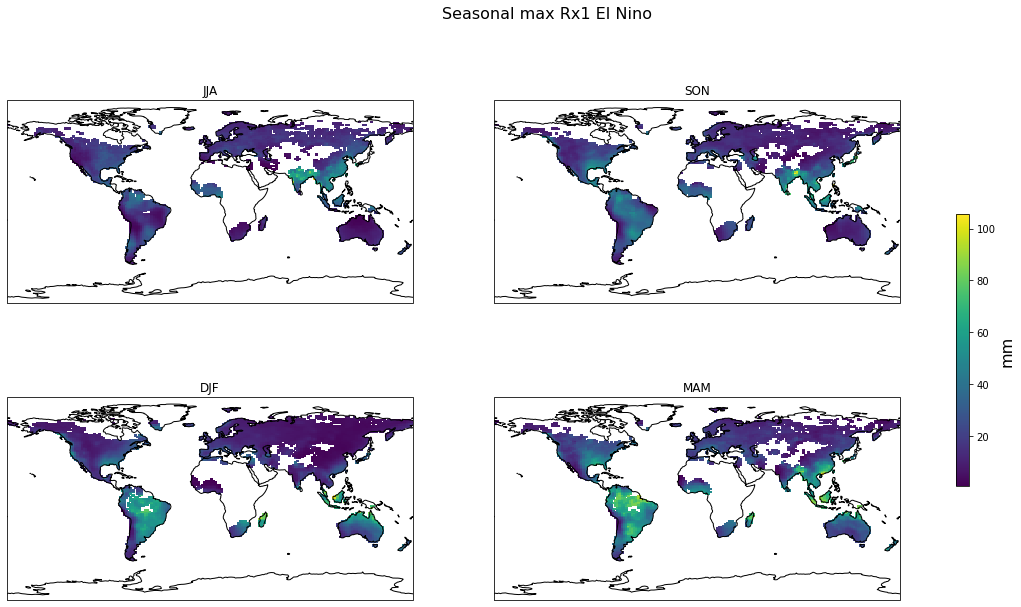

In [29]:
#plot el nino composites for each season Rx1
fig = plt.figure(figsize=(20,10))
axs = []

#vmin = 
#vmax = 

ax = fig.add_subplot(221, projection=ccrs.PlateCarree())
C = seasonal_Rx1_jja_1989_2018_el_nino.mean(dim='time').plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('JJA')
axs.append(ax)

ax = fig.add_subplot(222, projection=ccrs.PlateCarree())
C = seasonal_Rx1_son_1989_2018_el_nino.mean(dim='time').plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('SON')
axs.append(ax)

ax = fig.add_subplot(223, projection=ccrs.PlateCarree())
C = seasonal_Rx1_djf_1989_2018_el_nino.mean(dim='time').plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('DJF')
axs.append(ax)

ax = fig.add_subplot(224, projection=ccrs.PlateCarree())
C = seasonal_Rx1_mam_1989_2018_el_nino.mean(dim='time').plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('MAM')
axs.append(ax)

cbar = plt.colorbar(C, ax=axs, shrink=0.5, pad=0.05)
cbar.ax.set_ylabel('mm', fontsize=16)

fig.suptitle('Seasonal max Rx1 El Nino', fontsize=16)

Text(0.5, 0.98, 'Seasonal max Rx1 La Nina')

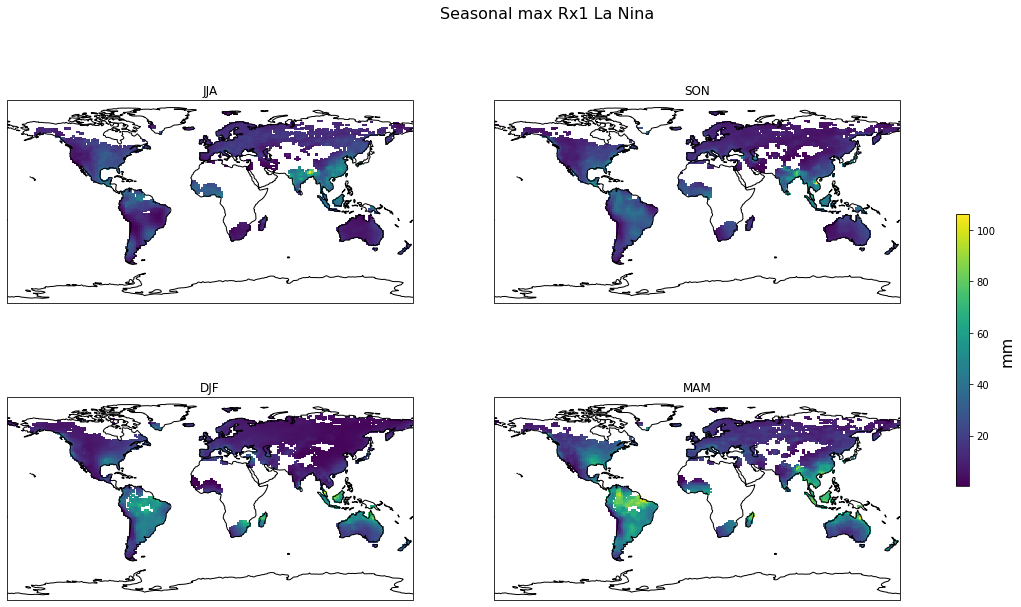

In [30]:
#plot el nino composites for each season Rx1
fig = plt.figure(figsize=(20,10))
axs = []

#vmin = 
#vmax = 

ax = fig.add_subplot(221, projection=ccrs.PlateCarree())
C = seasonal_Rx1_jja_1989_2018_la_nina.mean(dim='time').plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('JJA')
axs.append(ax)

ax = fig.add_subplot(222, projection=ccrs.PlateCarree())
C = seasonal_Rx1_son_1989_2018_la_nina.mean(dim='time').plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('SON')
axs.append(ax)

ax = fig.add_subplot(223, projection=ccrs.PlateCarree())
C = seasonal_Rx1_djf_1989_2018_la_nina.mean(dim='time').plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('DJF')
axs.append(ax)

ax = fig.add_subplot(224, projection=ccrs.PlateCarree())
C = seasonal_Rx1_mam_1989_2018_la_nina.mean(dim='time').plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('MAM')
axs.append(ax)

cbar = plt.colorbar(C, ax=axs, shrink=0.5, pad=0.05)
cbar.ax.set_ylabel('mm', fontsize=16)

fig.suptitle('Seasonal max Rx1 La Nina', fontsize=16)

In [24]:
#differences el nino - la nina 
TXx_comp_diff_mam = seasonal_TXx_mam_1989_2018_el_nino.mean(dim='time') - seasonal_TXx_mam_1989_2018_la_nina.mean(dim='time')
TXx_comp_diff_jja = seasonal_TXx_jja_1989_2018_el_nino.mean(dim='time') - seasonal_TXx_jja_1989_2018_la_nina.mean(dim='time')
TXx_comp_diff_son = seasonal_TXx_son_1989_2018_el_nino.mean(dim='time') - seasonal_TXx_son_1989_2018_la_nina.mean(dim='time')
TXx_comp_diff_djf = seasonal_TXx_djf_1989_2018_el_nino.mean(dim='time') - seasonal_TXx_djf_1989_2018_la_nina.mean(dim='time')
Rx1_comp_diff_mam = seasonal_Rx1_mam_1989_2018_el_nino.mean(dim='time') - seasonal_Rx1_mam_1989_2018_la_nina.mean(dim='time')
Rx1_comp_diff_jja = seasonal_Rx1_jja_1989_2018_el_nino.mean(dim='time') - seasonal_Rx1_jja_1989_2018_la_nina.mean(dim='time')
Rx1_comp_diff_son = seasonal_Rx1_son_1989_2018_el_nino.mean(dim='time') - seasonal_Rx1_son_1989_2018_la_nina.mean(dim='time')
Rx1_comp_diff_djf = seasonal_Rx1_djf_1989_2018_el_nino.mean(dim='time') - seasonal_Rx1_djf_1989_2018_la_nina.mean(dim='time')

Text(0.5, 0.98, 'Seasonal max TXx El Nino - La Nina')

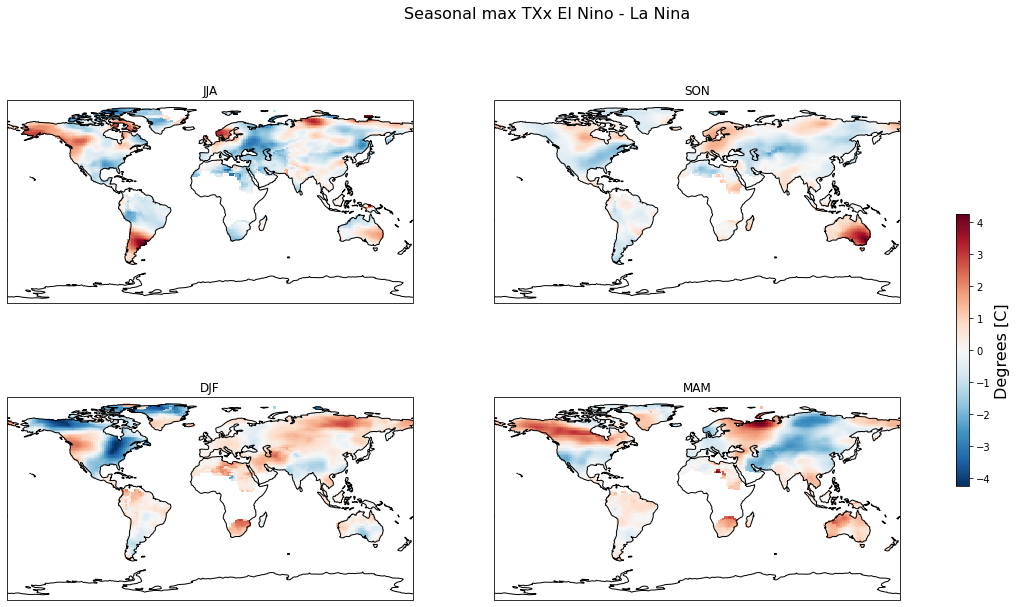

In [31]:
#plot el nino composites for each season TXx
fig = plt.figure(figsize=(20,10))
axs = []

#vmin = 
#vmax = 

ax = fig.add_subplot(221, projection=ccrs.PlateCarree())
C = TXx_comp_diff_jja.plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
ax.set_title('JJA')
axs.append(ax)

ax = fig.add_subplot(222, projection=ccrs.PlateCarree())
C = TXx_comp_diff_son.plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
ax.set_title('SON')
axs.append(ax)

ax = fig.add_subplot(223, projection=ccrs.PlateCarree())
C = TXx_comp_diff_djf.plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
ax.set_title('DJF')
axs.append(ax)

ax = fig.add_subplot(224, projection=ccrs.PlateCarree())
C = TXx_comp_diff_mam.plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
ax.set_title('MAM')
axs.append(ax)

cbar = plt.colorbar(C, ax=axs, shrink=0.5, pad=0.05)
cbar.ax.set_ylabel('Degrees [C]', fontsize=16)

fig.suptitle('Seasonal max TXx El Nino - La Nina', fontsize=16)

Text(0.5, 0.98, 'Seasonal max Rx1 El Nino - La Nina')

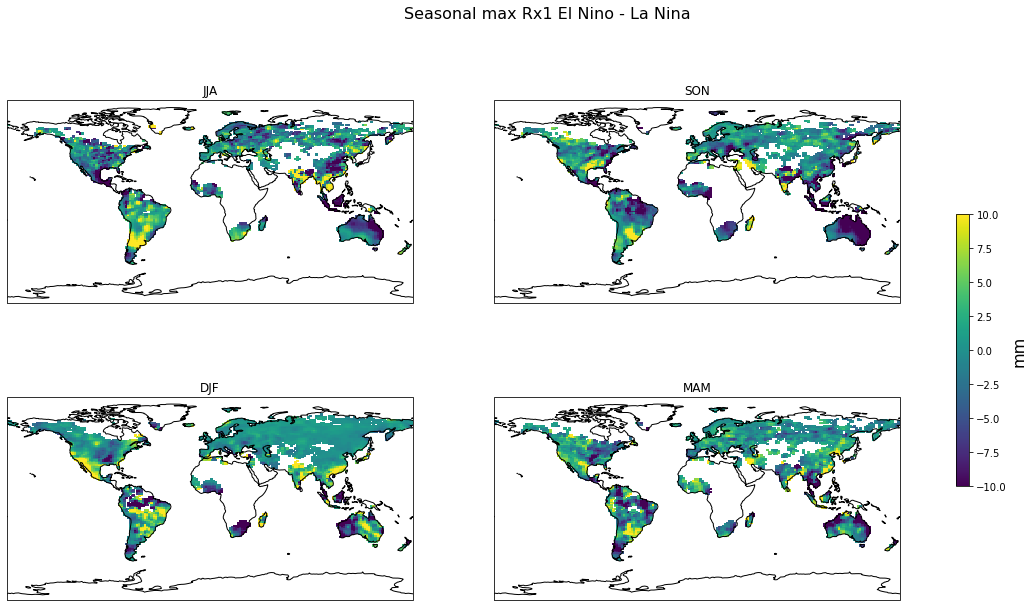

In [32]:
#plot el nino composites for each season Rx1
fig = plt.figure(figsize=(20,10))
axs = []

vmin = -10
vmax = 10

ax = fig.add_subplot(221, projection=ccrs.PlateCarree())
C = Rx1_comp_diff_jja.plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('JJA')
axs.append(ax)

ax = fig.add_subplot(222, projection=ccrs.PlateCarree())
C = Rx1_comp_diff_son.plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('SON')
axs.append(ax)

ax = fig.add_subplot(223, projection=ccrs.PlateCarree())
C = Rx1_comp_diff_djf.plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('DJF')
axs.append(ax)

ax = fig.add_subplot(224, projection=ccrs.PlateCarree())
C = Rx1_comp_diff_mam.plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('MAM')
axs.append(ax)

cbar = plt.colorbar(C, ax=axs, shrink=0.5, pad=0.05)
cbar.ax.set_ylabel('mm', fontsize=16)

fig.suptitle('Seasonal max Rx1 El Nino - La Nina', fontsize=16)